In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('category.csv')

In [3]:
df.head()

,Account No,Jan-June,July-Dec,Category
0,140010,11,14,0
1,140011,16,12,0
2,140012,20,13,0
3,140013,18,17,0
4,140014,15,8,0


In [4]:
df.corr()

,Account No,Jan-June,July-Dec,Category
Account No,1.000000,0.178638,0.364304,-0.131283
Jan-June,0.178638,1.000000,0.799747,-0.318713
July-Dec,0.364304,0.799747,1.000000,-0.567682
Category,-0.131283,-0.318713,-0.567682,1.000000


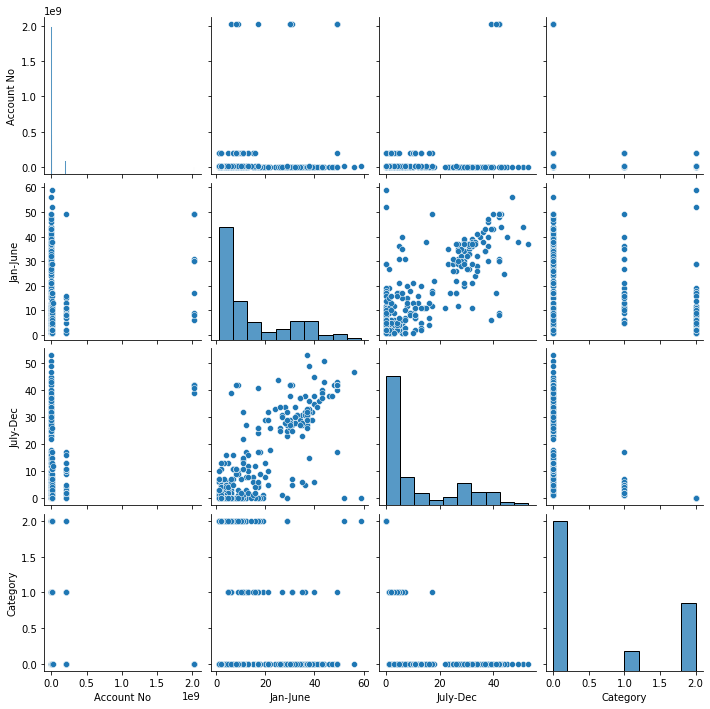

In [5]:

sns.pairplot(df)

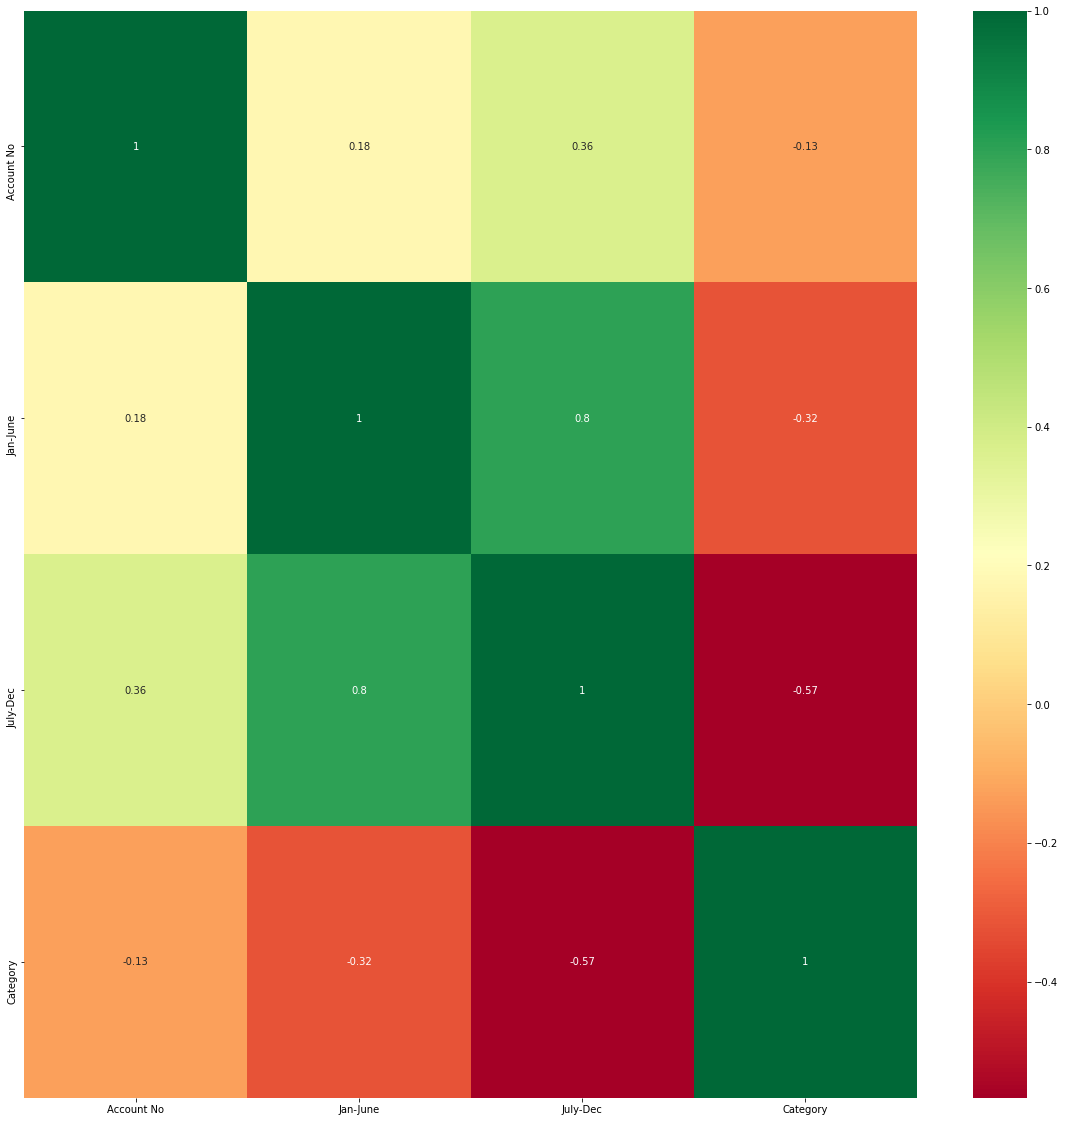

In [6]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [7]:
x = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values


In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=0)

In [9]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
#regressor.fit(x,y)

In [10]:

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [11]:

from sklearn.model_selection import RandomizedSearchCV

In [12]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [13]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [14]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = DecisionTreeRegressor()

In [15]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [16]:
rf.fit(x_train,y_train)

DecisionTreeRegressor()

In [17]:
predictions=rf.predict(x_test)

In [18]:
score = rf.score(x_test, y_test)
score

0.9824144486692015

C:\Users\amana\anaconda3\envs\dormant_account\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

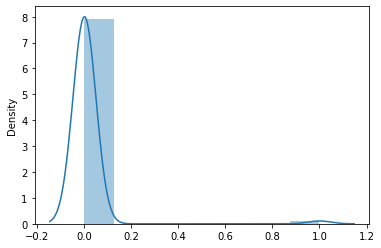

In [19]:
sns.distplot(y_test-predictions)

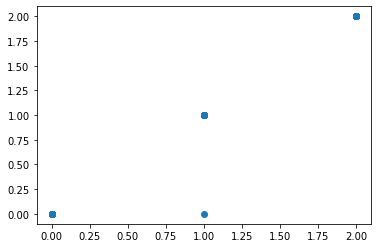

In [20]:

plt.scatter(y_test,predictions)

In [21]:

from sklearn import metrics

In [22]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.013513513513513514
MSE: 0.013513513513513514
RMSE: 0.11624763874381928


In [23]:

import pickle
# open a file, where you ant to store the data
file = open('decision_tree.pkl', 'wb')

# dump information to that file
pickle.dump(rf, file)